In [46]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import*

In [47]:
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [48]:
#initializing system and state variables!

r_0 = 147e9 * m

init = State(x=r_0, y=0, vx=0, vy=-30330*m/s)
r_earth = 6.371e6 * m
r_sun = 695.508e6 * m


system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1 * UNITS.year)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,1 year


In [49]:
#computes gravitational force!!
def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    v= Vector(vx, vy)
    r= Vector(x,y)
    forceMag = G * m1 * m2 / r.mag**2
    direction= r.hat()
    force = direction*forceMag
    return force

In [50]:
universal_gravitation(init, system)

<Quantity([3.6686486e+22 0.0000000e+00], 'newton')>

In [51]:
#defining the slope function!
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
    v= Vector(vx, vy)
    r= Vector(x,y)
    force = -universal_gravitation(state, system)
    dxdt=v.x
    dydt = v.y
    dvdt = force / m2
    
    return dxdt, dydt, dvdt.x, dvdt.y

In [52]:
slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-30330.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [53]:
#stops the simulation before the collision
def event_func(state, t, system):
    x, y, vx, vy = state
    r= Vector(x,y)
    return  system.r_final

In [54]:
#testing
event_func(init, 0, system)

<Quantity(701879000.0, 'meter')>

In [55]:
#let's run it!
results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
sol,None
t_events,[[]]
nfev,152
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [56]:
t_final = get_last_label(results) * s

<Quantity(31556925.9747, 'second')>

In [57]:
t_final.to(UNITS.day)

<Quantity(365.24219878124995, 'day')>

In [58]:
ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts, method = 'RK23')

In [59]:
results.index /= 60 * 60 * 24

In [60]:
x = results.x / 1e9;
y = results.y /1e9;


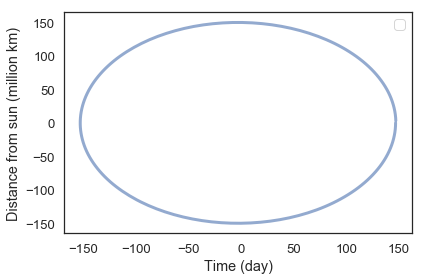

In [63]:
plot(x,y)
decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')